In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

### Data discovery

In [3]:
data_raw = pd.read_csv('loans_2007.csv')
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42552 entries, 0 to 42551
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42552 non-null  object 
 1   member_id                   42549 non-null  float64
 2   loan_amnt                   42549 non-null  float64
 3   funded_amnt                 42549 non-null  float64
 4   funded_amnt_inv             42549 non-null  float64
 5   term                        42549 non-null  object 
 6   int_rate                    42549 non-null  object 
 7   installment                 42549 non-null  float64
 8   grade                       42549 non-null  object 
 9   sub_grade                   42549 non-null  object 
 10  emp_title                   39921 non-null  object 
 11  emp_length                  41436 non-null  object 
 12  home_ownership              42549 non-null  object 
 13  annual_inc                  425

C:\Users\Kieu Trung Ha\AppData\Local\Temp\ipykernel_19284\322837443.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv('loans_2007.csv')


In [4]:
# Because of the main goal requirements, Let's remove all the loans that don't contain either Fully Paid or Charged Off as the loan's status.
data_raw = data_raw.drop(data_raw[~data_raw['loan_status'].isin(['Fully Paid', 'Charged Off'])].index)
data_raw.reset_index(drop=True, inplace=True)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38782 entries, 0 to 38781
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38782 non-null  object 
 1   member_id                   38782 non-null  float64
 2   loan_amnt                   38782 non-null  float64
 3   funded_amnt                 38782 non-null  float64
 4   funded_amnt_inv             38782 non-null  float64
 5   term                        38782 non-null  object 
 6   int_rate                    38782 non-null  object 
 7   installment                 38782 non-null  float64
 8   grade                       38782 non-null  object 
 9   sub_grade                   38782 non-null  object 
 10  emp_title                   36385 non-null  object 
 11  emp_length                  37745 non-null  object 
 12  home_ownership              38782 non-null  object 
 13  annual_inc                  387

In [5]:
# remove duplicated columns
data_raw = data_raw.drop_duplicates()

# Đặt lại chỉ mục
data_raw = data_raw.reset_index(drop=True)

# these are recommended columns that should be dropped
columns_rcm_remove = ["collection_recovery_fee", "desc", "earliest_cr_line", "emp_title", "funded_amnt", 
                      "funded_amnt_inv", "grade", "id", "issue_d", "last_credit_pull_d", "last_pymnt_amnt",
                      "last_pymnt_d", "member_id", "out_prncp", "out_prncp_inv", "pub_rec_bankruptcies",
                      "recoveries", "sub_grade", "total_pymnt", "total_pymnt_inv", "total_rec_int", "total_rec_late_fee",
                      "total_rec_prncp", "url", "zip_code"]

existing_columns = list(set(columns_rcm_remove).intersection(data_raw.columns))
data_raw.drop(columns=existing_columns, inplace=True)

In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38774 entries, 0 to 38773
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38774 non-null  float64
 1   term                        38774 non-null  object 
 2   int_rate                    38774 non-null  object 
 3   installment                 38774 non-null  float64
 4   emp_length                  37737 non-null  object 
 5   home_ownership              38774 non-null  object 
 6   annual_inc                  38774 non-null  float64
 7   verification_status         38774 non-null  object 
 8   loan_status                 38774 non-null  object 
 9   pymnt_plan                  38774 non-null  object 
 10  purpose                     38774 non-null  object 
 11  title                       38763 non-null  object 
 12  addr_state                  38774 non-null  object 
 13  dti                         387

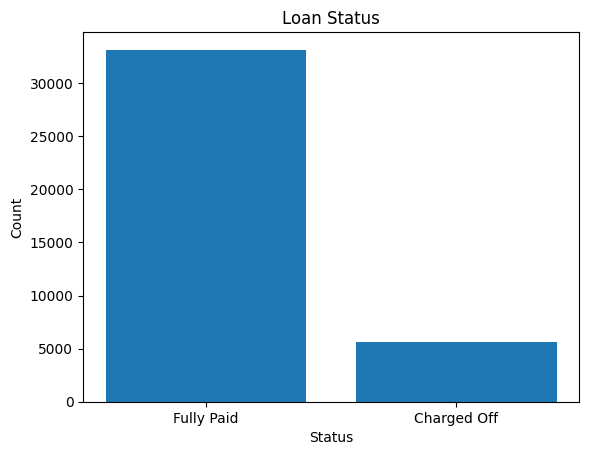

In [7]:
# Đếm số hàng có giá trị "Fully Paid" và "Charged Off"
data_raw_copy = data_raw.copy()

status_counts = data_raw_copy['loan_status'].value_counts()

# Lấy giá trị Fully Paid và Charged Off
fully_paid_count = status_counts['Fully Paid']
charged_off_count = status_counts['Charged Off']

# Tạo biểu đồ
labels = ['Fully Paid', 'Charged Off']
values = [fully_paid_count, charged_off_count]

plt.bar(labels, values)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Loan Status')
plt.show()

In [8]:
list(data_raw_copy.columns)

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'title',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [9]:
data_raw_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38774 entries, 0 to 38773
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38774 non-null  float64
 1   term                        38774 non-null  object 
 2   int_rate                    38774 non-null  object 
 3   installment                 38774 non-null  float64
 4   emp_length                  37737 non-null  object 
 5   home_ownership              38774 non-null  object 
 6   annual_inc                  38774 non-null  float64
 7   verification_status         38774 non-null  object 
 8   loan_status                 38774 non-null  object 
 9   pymnt_plan                  38774 non-null  object 
 10  purpose                     38774 non-null  object 
 11  title                       38763 non-null  object 
 12  addr_state                  38774 non-null  object 
 13  dti                         387

In [10]:
data_raw_copy.to_csv('data_raw.csv')

### Convert data types

In [11]:
df_raw = data_raw_copy.copy()

# in_rate
df_raw['int_rate'] = df_raw['int_rate'].str.rstrip('%').astype(float) / 100

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38774 entries, 0 to 38773
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38774 non-null  float64
 1   term                        38774 non-null  object 
 2   int_rate                    38774 non-null  float64
 3   installment                 38774 non-null  float64
 4   emp_length                  37737 non-null  object 
 5   home_ownership              38774 non-null  object 
 6   annual_inc                  38774 non-null  float64
 7   verification_status         38774 non-null  object 
 8   loan_status                 38774 non-null  object 
 9   pymnt_plan                  38774 non-null  object 
 10  purpose                     38774 non-null  object 
 11  title                       38763 non-null  object 
 12  addr_state                  38774 non-null  object 
 13  dti                         387

In [12]:
# term
df_raw['term'] = df_raw['term'].replace({' 36 months': 36, ' 60 months': 60}).astype(float)

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38774 entries, 0 to 38773
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38774 non-null  float64
 1   term                        38774 non-null  float64
 2   int_rate                    38774 non-null  float64
 3   installment                 38774 non-null  float64
 4   emp_length                  37737 non-null  object 
 5   home_ownership              38774 non-null  object 
 6   annual_inc                  38774 non-null  float64
 7   verification_status         38774 non-null  object 
 8   loan_status                 38774 non-null  object 
 9   pymnt_plan                  38774 non-null  object 
 10  purpose                     38774 non-null  object 
 11  title                       38763 non-null  object 
 12  addr_state                  38774 non-null  object 
 13  dti                         387

In [13]:
# emp_length
for i in range(len(df_raw)): 
    if type(df_raw.loc[i, 'emp_length']) != float:
        if df_raw.loc[i, 'emp_length'].split()[0] == "10+":
            df_raw.loc[i, 'emp_length'] = 11.0
        elif df_raw.loc[i, 'emp_length'].split()[0] == "<":
            df_raw.loc[i, 'emp_length'] = 0.5
        else: 
            df_raw.loc[i, 'emp_length'] = float(df_raw.loc[i, 'emp_length'].split()[0])

df_raw['emp_length'] = df_raw['emp_length'].astype(float)

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38774 entries, 0 to 38773
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38774 non-null  float64
 1   term                        38774 non-null  float64
 2   int_rate                    38774 non-null  float64
 3   installment                 38774 non-null  float64
 4   emp_length                  37737 non-null  float64
 5   home_ownership              38774 non-null  object 
 6   annual_inc                  38774 non-null  float64
 7   verification_status         38774 non-null  object 
 8   loan_status                 38774 non-null  object 
 9   pymnt_plan                  38774 non-null  object 
 10  purpose                     38774 non-null  object 
 11  title                       38763 non-null  object 
 12  addr_state                  38774 non-null  object 
 13  dti                         387

In [14]:
# home_ownership
# kiểm tra giá trị trung lặp 
unique_values = df_raw['home_ownership'].unique()

# xử lý giá trị trùng lặp
df_raw['home_ownership'] = df_raw['home_ownership'].str.upper()

unique_values = df_raw['home_ownership'].unique()

print(unique_values)

['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']


In [15]:
# verification_status 
# kiểm tra giá trị trung lặp 
unique_values = df_raw['verification_status'].unique()
print("Giá trị của cột verification_status: ", unique_values)

# xử lý giá trị trùng lặp
df_raw['verification_status'] = df_raw['verification_status'].str.strip()
df_raw['verification_status'] = df_raw['verification_status'].str.lower()

unique_values = df_raw['verification_status'].unique()

print("Giá trị của cột verification_status sau khi xử lý trùng lặp: ", unique_values)



df_raw.info()

Giá trị của cột verification_status:  ['Verified' 'Source Verified' 'Not Verified' 'NOT VERIFIED' 'Not verified'
 'Source verified' 'verified' 'Source Verified ' 'Not Verified '
 ' Not Verified']
Giá trị của cột verification_status sau khi xử lý trùng lặp:  ['verified' 'source verified' 'not verified']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38774 entries, 0 to 38773
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   38774 non-null  float64
 1   term                        38774 non-null  float64
 2   int_rate                    38774 non-null  float64
 3   installment                 38774 non-null  float64
 4   emp_length                  37737 non-null  float64
 5   home_ownership              38774 non-null  object 
 6   annual_inc                  38774 non-null  float64
 7   verification_status         38774 non-null  object 
 8   loan_status 

In [16]:
list_columns = ["pymnt_plan", "title", "initial_list_status", "collections_12_mths_ex_med", "policy_code", "application_type", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", "tax_liens"]

df_raw = df_raw.drop(columns=list_columns)

In [17]:
# revol_util
df_raw['revol_util'] = df_raw['revol_util'].str.rstrip('%').astype(float) / 100

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38774 entries, 0 to 38773
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38774 non-null  float64
 1   term                 38774 non-null  float64
 2   int_rate             38774 non-null  float64
 3   installment          38774 non-null  float64
 4   emp_length           37737 non-null  float64
 5   home_ownership       38774 non-null  object 
 6   annual_inc           38774 non-null  float64
 7   verification_status  38774 non-null  object 
 8   loan_status          38774 non-null  object 
 9   purpose              38774 non-null  object 
 10  addr_state           38774 non-null  object 
 11  dti                  38774 non-null  float64
 12  delinq_2yrs          38774 non-null  float64
 13  inq_last_6mths       38774 non-null  float64
 14  open_acc             38774 non-null  float64
 15  pub_rec              38774 non-null 

In [18]:
# loan_status
# kiểm tra giá trị trung lặp 
unique_values = df_raw['loan_status'].unique()

# in kết quả kiểm tra giá trị trùng lặp 
print(unique_values)

# Thay thế giá trị
df_raw['loan_status'] = df_raw['loan_status'].replace({'Fully Paid': 1.0, 'Charged Off': 0.0})

df_raw.info()

['Fully Paid' 'Charged Off']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38774 entries, 0 to 38773
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38774 non-null  float64
 1   term                 38774 non-null  float64
 2   int_rate             38774 non-null  float64
 3   installment          38774 non-null  float64
 4   emp_length           37737 non-null  float64
 5   home_ownership       38774 non-null  object 
 6   annual_inc           38774 non-null  float64
 7   verification_status  38774 non-null  object 
 8   loan_status          38774 non-null  float64
 9   purpose              38774 non-null  object 
 10  addr_state           38774 non-null  object 
 11  dti                  38774 non-null  float64
 12  delinq_2yrs          38774 non-null  float64
 13  inq_last_6mths       38774 non-null  float64
 14  open_acc             38774 non-null  float64
 15  pub_rec

In [19]:
df_raw

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000.0,36.0,0.1065,162.87,11.0,RENT,24000.0,verified,1.0,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,13648.0,0.837,9.0
1,2500.0,60.0,0.1527,59.83,0.5,RENT,30000.0,source verified,0.0,car,GA,1.00,0.0,5.0,3.0,0.0,1687.0,0.094,4.0
2,2400.0,36.0,0.1596,84.33,11.0,RENT,12252.0,not verified,1.0,small_business,IL,8.72,0.0,2.0,2.0,0.0,2956.0,0.985,10.0
3,10000.0,36.0,0.1349,339.31,11.0,RENT,49200.0,source verified,1.0,other,CA,20.00,0.0,1.0,10.0,0.0,5598.0,0.210,37.0
4,5000.0,36.0,0.0790,156.46,3.0,RENT,36000.0,source verified,1.0,wedding,AZ,11.20,0.0,3.0,9.0,0.0,7963.0,0.283,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38769,2500.0,36.0,0.0807,78.42,4.0,MORTGAGE,110000.0,not verified,1.0,home_improvement,CO,11.33,0.0,0.0,13.0,0.0,7274.0,0.131,40.0
38770,8500.0,36.0,0.1028,275.38,3.0,RENT,18000.0,not verified,1.0,credit_card,NC,6.40,1.0,1.0,6.0,0.0,8847.0,0.269,9.0
38771,5000.0,36.0,0.0807,156.84,0.5,MORTGAGE,100000.0,not verified,1.0,debt_consolidation,MA,2.30,0.0,0.0,11.0,0.0,9698.0,0.194,20.0
38772,5000.0,36.0,0.0743,155.38,0.5,MORTGAGE,200000.0,not verified,1.0,other,MD,3.72,0.0,0.0,17.0,0.0,85607.0,0.007,26.0


In [20]:
# addr_state
unique_values = df_raw['addr_state'].unique()

# in kết quả kiểm tra giá trị trùng lặp 
print(unique_values)

df_raw = df_raw.drop(columns=["addr_state"])

['AZ' 'GA' 'IL' 'CA' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA' 'MN'
 'NJ' 'OR' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'KS' 'NV' 'AK'
 'CO' 'MD' 'WV' 'VT' 'MI' 'DC' 'SD' 'NH' 'AR' 'NM' 'HI' 'OK' 'MT' 'WY'
 'DE' 'MS' 'TN' ' MA' 'IA' 'NE' 'ID' 'IN' 'ME']


In [21]:
# purpose
unique_values = df_raw['purpose'].unique()

# in kết quả kiểm tra giá trị trùng lặp 
print(unique_values)

df_raw = df_raw.drop(columns=["purpose"])

['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']


In [22]:
# purpose
unique_values = df_raw['home_ownership'].unique()

# in kết quả kiểm tra giá trị trùng lặp 
print(unique_values)

['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']


In [23]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Tạo DataFrame mẫu với cột "home_ownership"
data = df_raw.copy()

# Sử dụng OneHotEncoder để mã hóa one-hot encoding
encoder = OneHotEncoder(sparse=False)
encoded_cols = encoder.fit_transform(data[['home_ownership']])

# Tạo DataFrame mới từ các cột đã mã hóa
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.categories_[0]).drop(columns=["NONE"])

# Sử dụng phương thức merge() để nối theo chỉ mục
merged_df = pd.merge(data.drop(columns=['home_ownership']), encoded_df, left_index=True, right_index=True)

merged_df

c:\Users\Kieu Trung Ha\Desktop\barefoot_task_1\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,loan_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,MORTGAGE,OTHER,OWN,RENT
0,5000.0,36.0,0.1065,162.87,11.0,24000.0,verified,1.0,27.65,0.0,1.0,3.0,0.0,13648.0,0.837,9.0,0.0,0.0,0.0,1.0
1,2500.0,60.0,0.1527,59.83,0.5,30000.0,source verified,0.0,1.00,0.0,5.0,3.0,0.0,1687.0,0.094,4.0,0.0,0.0,0.0,1.0
2,2400.0,36.0,0.1596,84.33,11.0,12252.0,not verified,1.0,8.72,0.0,2.0,2.0,0.0,2956.0,0.985,10.0,0.0,0.0,0.0,1.0
3,10000.0,36.0,0.1349,339.31,11.0,49200.0,source verified,1.0,20.00,0.0,1.0,10.0,0.0,5598.0,0.210,37.0,0.0,0.0,0.0,1.0
4,5000.0,36.0,0.0790,156.46,3.0,36000.0,source verified,1.0,11.20,0.0,3.0,9.0,0.0,7963.0,0.283,12.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38769,2500.0,36.0,0.0807,78.42,4.0,110000.0,not verified,1.0,11.33,0.0,0.0,13.0,0.0,7274.0,0.131,40.0,1.0,0.0,0.0,0.0
38770,8500.0,36.0,0.1028,275.38,3.0,18000.0,not verified,1.0,6.40,1.0,1.0,6.0,0.0,8847.0,0.269,9.0,0.0,0.0,0.0,1.0
38771,5000.0,36.0,0.0807,156.84,0.5,100000.0,not verified,1.0,2.30,0.0,0.0,11.0,0.0,9698.0,0.194,20.0,1.0,0.0,0.0,0.0
38772,5000.0,36.0,0.0743,155.38,0.5,200000.0,not verified,1.0,3.72,0.0,0.0,17.0,0.0,85607.0,0.007,26.0,1.0,0.0,0.0,0.0


In [24]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Tạo DataFrame mẫu với cột "home_ownership"
data = merged_df.copy()

# Sử dụng OneHotEncoder để mã hóa one-hot encoding
encoder = OneHotEncoder(sparse=False)
encoded_cols = encoder.fit_transform(data[['verification_status']])

# Tạo DataFrame mới từ các cột đã mã hóa
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.categories_[0])

# Sử dụng phương thức merge() để nối theo chỉ mục
merged_df = pd.merge(data.drop(columns=['verification_status']), encoded_df, left_index=True, right_index=True)

merged_df

c:\Users\Kieu Trung Ha\Desktop\barefoot_task_1\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,revol_bal,revol_util,total_acc,MORTGAGE,OTHER,OWN,RENT,not verified,source verified,verified
0,5000.0,36.0,0.1065,162.87,11.0,24000.0,1.0,27.65,0.0,1.0,...,13648.0,0.837,9.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2500.0,60.0,0.1527,59.83,0.5,30000.0,0.0,1.00,0.0,5.0,...,1687.0,0.094,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2400.0,36.0,0.1596,84.33,11.0,12252.0,1.0,8.72,0.0,2.0,...,2956.0,0.985,10.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,10000.0,36.0,0.1349,339.31,11.0,49200.0,1.0,20.00,0.0,1.0,...,5598.0,0.210,37.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,5000.0,36.0,0.0790,156.46,3.0,36000.0,1.0,11.20,0.0,3.0,...,7963.0,0.283,12.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38769,2500.0,36.0,0.0807,78.42,4.0,110000.0,1.0,11.33,0.0,0.0,...,7274.0,0.131,40.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
38770,8500.0,36.0,0.1028,275.38,3.0,18000.0,1.0,6.40,1.0,1.0,...,8847.0,0.269,9.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
38771,5000.0,36.0,0.0807,156.84,0.5,100000.0,1.0,2.30,0.0,0.0,...,9698.0,0.194,20.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
38772,5000.0,36.0,0.0743,155.38,0.5,200000.0,1.0,3.72,0.0,0.0,...,85607.0,0.007,26.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38774 entries, 0 to 38773
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loan_amnt        38774 non-null  float64
 1   term             38774 non-null  float64
 2   int_rate         38774 non-null  float64
 3   installment      38774 non-null  float64
 4   emp_length       37737 non-null  float64
 5   annual_inc       38774 non-null  float64
 6   loan_status      38774 non-null  float64
 7   dti              38774 non-null  float64
 8   delinq_2yrs      38774 non-null  float64
 9   inq_last_6mths   38774 non-null  float64
 10  open_acc         38774 non-null  float64
 11  pub_rec          38774 non-null  float64
 12  revol_bal        38774 non-null  float64
 13  revol_util       38724 non-null  float64
 14  total_acc        38774 non-null  float64
 15  MORTGAGE         38774 non-null  float64
 16  OTHER            38774 non-null  float64
 17  OWN         

In [142]:
merged_df.to_csv("data_processing.csv")

In [99]:
df_raw.to_csv("dataframe_raw.csv")

### Missing value

In [27]:
df_missing_values = merged_df.copy()

# Tính tổng số dòng chứa giá trị null (chỉ tính mỗi dòng chứa nhiều giá trị null là 1)
total_null_rows = (df_missing_values.isnull().sum(axis=1) > 0).sum()

# In kết quả
print("Tổng số dòng chứa giá trị null (chỉ tính mỗi dòng chứa nhiều giá trị null là 1):", total_null_rows)

Tổng số dòng chứa giá trị null (chỉ tính mỗi dòng chứa nhiều giá trị null là 1): 1084


In [28]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38774 entries, 0 to 38773
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loan_amnt        38774 non-null  float64
 1   term             38774 non-null  float64
 2   int_rate         38774 non-null  float64
 3   installment      38774 non-null  float64
 4   emp_length       37737 non-null  float64
 5   annual_inc       38774 non-null  float64
 6   loan_status      38774 non-null  float64
 7   dti              38774 non-null  float64
 8   delinq_2yrs      38774 non-null  float64
 9   inq_last_6mths   38774 non-null  float64
 10  open_acc         38774 non-null  float64
 11  pub_rec          38774 non-null  float64
 12  revol_bal        38774 non-null  float64
 13  revol_util       38724 non-null  float64
 14  total_acc        38774 non-null  float64
 15  MORTGAGE         38774 non-null  float64
 16  OTHER            38774 non-null  float64
 17  OWN         

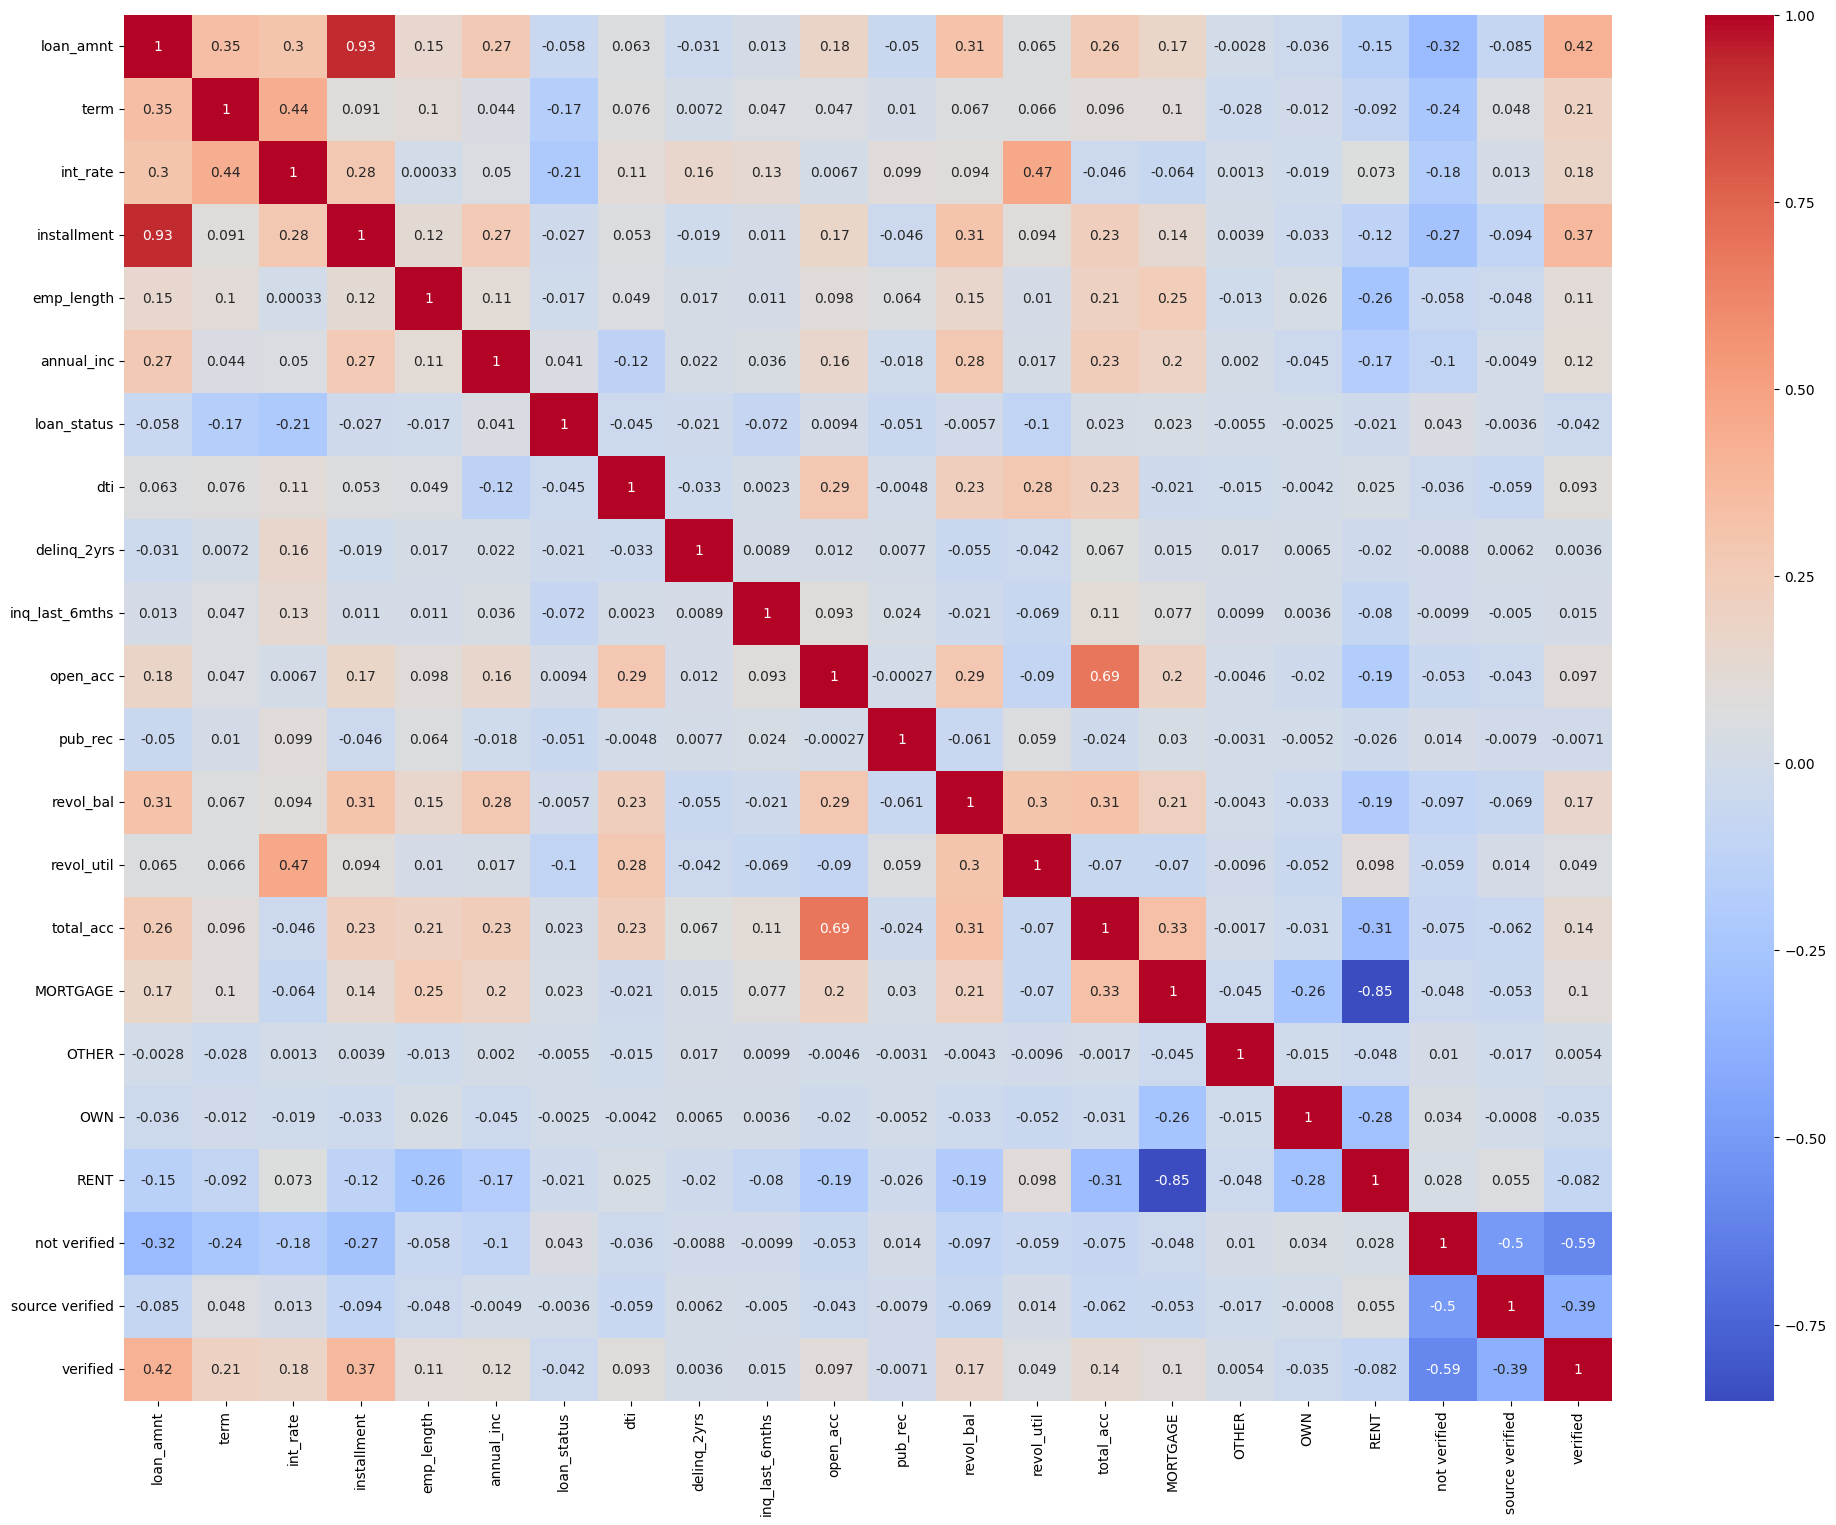

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo ma trận correlation
correlation_matrix = merged_df.corr()

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(24, 18))  # Kích thước 8x6 inches

# Vẽ ma trận correlation bằng seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Hiển thị đồ thị
plt.show()

In [32]:
# Loại bỏ các hàng chứa giá trị NaN
df = merged_df.dropna()

# Đặt lại chỉ mục
df = df.reset_index(drop=True)

df

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,...,revol_bal,revol_util,total_acc,MORTGAGE,OTHER,OWN,RENT,not verified,source verified,verified
0,5000.0,36.0,0.1065,162.87,11.0,24000.0,1.0,27.65,0.0,1.0,...,13648.0,0.837,9.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2500.0,60.0,0.1527,59.83,0.5,30000.0,0.0,1.00,0.0,5.0,...,1687.0,0.094,4.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2400.0,36.0,0.1596,84.33,11.0,12252.0,1.0,8.72,0.0,2.0,...,2956.0,0.985,10.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,10000.0,36.0,0.1349,339.31,11.0,49200.0,1.0,20.00,0.0,1.0,...,5598.0,0.210,37.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,5000.0,36.0,0.0790,156.46,3.0,36000.0,1.0,11.20,0.0,3.0,...,7963.0,0.283,12.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37685,2500.0,36.0,0.0807,78.42,4.0,110000.0,1.0,11.33,0.0,0.0,...,7274.0,0.131,40.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
37686,8500.0,36.0,0.1028,275.38,3.0,18000.0,1.0,6.40,1.0,1.0,...,8847.0,0.269,9.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
37687,5000.0,36.0,0.0807,156.84,0.5,100000.0,1.0,2.30,0.0,0.0,...,9698.0,0.194,20.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
37688,5000.0,36.0,0.0743,155.38,0.5,200000.0,1.0,3.72,0.0,0.0,...,85607.0,0.007,26.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [33]:
df.to_csv("dataframe_final.csv")

### Machine Learning Model for Predicting the Repayment Rate of Loan Takers

#### Logistic regression

In [39]:
# using lasso regression
data_set = pd.read_csv("dataframe_final.csv")

data_set = data_set.drop(data_set.columns[0], axis=1)

data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37690 entries, 0 to 37689
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loan_amnt        37690 non-null  float64
 1   term             37690 non-null  float64
 2   int_rate         37690 non-null  float64
 3   installment      37690 non-null  float64
 4   emp_length       37690 non-null  float64
 5   annual_inc       37690 non-null  float64
 6   loan_status      37690 non-null  float64
 7   dti              37690 non-null  float64
 8   delinq_2yrs      37690 non-null  float64
 9   inq_last_6mths   37690 non-null  float64
 10  open_acc         37690 non-null  float64
 11  pub_rec          37690 non-null  float64
 12  revol_bal        37690 non-null  float64
 13  revol_util       37690 non-null  float64
 14  total_acc        37690 non-null  float64
 15  MORTGAGE         37690 non-null  float64
 16  OTHER            37690 non-null  float64
 17  OWN         

In [40]:
# chia dữ liệu thành đầu vào và đầu ra 
X = data_set.drop("loan_status", axis=1)
y = data_set['loan_status']

# chia dữ liệu thành training set và testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo mô hình Lasso Regression
lasso = Lasso(alpha=0.1)  # alpha là một tham số quyết định mức độ giảm thiểu của L1 regularization

# Huấn luyện mô hình trên tập huấn luyện
lasso.fit(X_train, y_train)

# Lấy các hệ số của mô hình
coefficients = lasso.coef_

# In ra các biến được chọn và hệ số tương ứng
selected_variables = X.columns[coefficients != 0]
selected_coefficients = coefficients[coefficients != 0]
for var, coef in zip(selected_variables, selected_coefficients):
    print(f"{var}: {coef}")

loan_amnt: 1.2342917219448614e-06
term: -0.005161413486809744
installment: -9.024710685662457e-05
annual_inc: 3.025447453659789e-07
revol_bal: -9.241673693053675e-08
total_acc: 0.00028162351190853113


In [41]:
coefficients

array([ 1.23429172e-06, -5.16141349e-03, -0.00000000e+00, -9.02471069e-05,
       -0.00000000e+00,  3.02544745e-07, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -9.24167369e-08,
       -0.00000000e+00,  2.81623512e-04,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00])

### 

In [42]:
X = data_set.loc[:, ['loan_amnt', 'term', 'installment', 'annual_inc', 'revol_bal', 'total_acc']]
y = y = data_set['loan_status']

# chia dữ liệu thành training set và testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# tạo mô hình logistic regression sử dụng focal loss 
model = LogisticRegression()

# Huấn luyện mô hình 
model.fit(X_train, y_train)

LogisticRegression()

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dự đoán nhãn cho dữ liệu kiểm tra
y_pred = model.predict(X_test)

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)

# Tính precision
precision = precision_score(y_test, y_pred)

# Tính recall
recall = recall_score(y_test, y_pred)

# Tính F1-score
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Accuracy: ", accuracy)

Precision: 0.8599734042553191
Recall: 0.9983019450447669
F1-score: 0.9239891413059007
Accuracy:  0.8588485009286283


In [61]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   7 1053]
 [  11 6467]]
              precision    recall  f1-score   support

         0.0       0.39      0.01      0.01      1060
         1.0       0.86      1.00      0.92      6478

    accuracy                           0.86      7538
   macro avg       0.62      0.50      0.47      7538
weighted avg       0.79      0.86      0.80      7538



#### Random forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=800)
rfc.fit(X_train, y_train)
predictionRF = rfc.predict(X_test)

# Tính độ chính xác
accuracy_rfc = accuracy_score(y_test, y_pred)

# Tính precision
precision_rfc = precision_score(y_test, y_pred)

# Tính recall
recall_rfc = recall_score(y_test, y_pred)

# Tính F1-score
f1_rfc = f1_score(y_test, y_pred)

print("Precision:", precision_rfc)
print("Recall:", recall_rfc)
print("F1-score:", f1_rfc)
print("Accuracy: ", accuracy_rfc)

Precision: 0.8599734042553191
Recall: 0.9983019450447669
F1-score: 0.9239891413059007
Accuracy:  0.8588485009286283


In [64]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, predictionRF))
print(classification_report(y_test, predictionRF))

[[  29 1031]
 [  71 6407]]
              precision    recall  f1-score   support

         0.0       0.29      0.03      0.05      1060
         1.0       0.86      0.99      0.92      6478

    accuracy                           0.85      7538
   macro avg       0.58      0.51      0.49      7538
weighted avg       0.78      0.85      0.80      7538



#### Weighted Logistic regression 

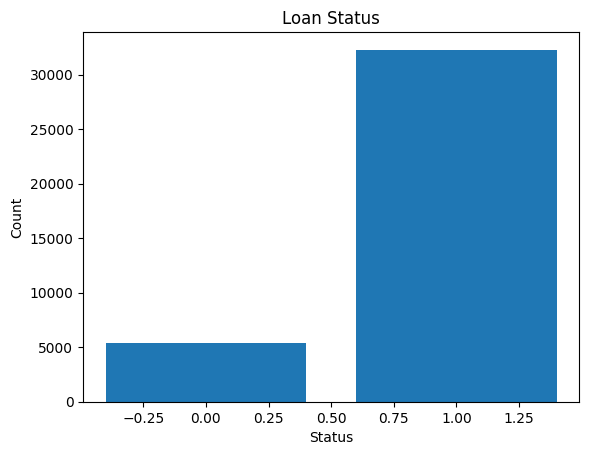

In [65]:
# Đếm số hàng có giá trị "Fully Paid" và "Charged Off"
data_set_copy = data_set.copy()

status_counts = data_set_copy['loan_status'].value_counts()

# Lấy giá trị Fully Paid và Charged Off
fully_paid_count = status_counts[1.0]
charged_off_count = status_counts[0.0]

# Tạo biểu đồ
labels = [1.0, 0.0]
values = [fully_paid_count, charged_off_count]

plt.bar(labels, values)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Loan Status')
plt.show()

In [68]:
fully_paid_count/charged_off_count

5.99128176590614

In [70]:
# Define the class weights
class_weights = {1.0: 6, 0.0: 1}  # Adjust the weights based on the class imbalance

# Create the logistic regression model with class weights
model = LogisticRegression(class_weight=class_weights)

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   0 1060]
 [   2 6476]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1060
         1.0       0.86      1.00      0.92      6478

    accuracy                           0.86      7538
   macro avg       0.43      0.50      0.46      7538
weighted avg       0.74      0.86      0.79      7538

